# Theory

We will be training a basic feedforward neural network using stochastic gradient descent.

To do this we need to understand how backpropgation will work.

We'll first need to understand what we are trying to minimize (our loss function). We will use a standard MSE error $(y-y_{pred})^2$

Let's say we have a simple 3 layer Neural network, with 1 input layer, 1 output, and 1 hidden layer with 2 neurons.
We can find the gradient w/ respect to the weights and biases through the chain rule

Say we're trying to find the derivative of the loss w/ respect to the first weight connecting the input to the first neuron of the hidden layer. $\frac{\partial L}{\partial w_1}$

We thus have $\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial y_{pred}} * \frac{\partial y_{pred}}{\partial h_1} * \frac{\partial h_1}{\partial w_1}$ through the chain rule where $h_1$ is the output of the first hidden node 

We therefore have $\frac{\partial L}{\partial y_{pred}} = -2 * (y-y_{pred})$

If $f$ is our activation function, we have $\frac{\partial y_{pred}}{\partial h_1}= w_{h_1} * f'(w_{h_1}h_1+w_{h_2}h_2+b_{y_{pred}})$
and
$\frac{\partial h_1}{\partial w_1}= \text{input}_1 * f'(w_1\text{input}_1+w_{2}\text{input}_2+b_{h_1})$

If we wanted for biases instead, we'd simply replace $\frac{\partial h_1}{\partial w_1}$ with
$\frac{\partial h_1}{\partial b_1} = f'(w_1\text{input}_1+w_{2}\text{input}_2+b_{h_1})$

If we assume a sigmoid activation function, these can be simplified using the derivative property of the function
f'(x) = f(x)(1-f(x)) thus

$\frac{\partial y_{pred}}{\partial h_1}= w_{h_1} * y_{pred}(1-y_{pred})$ and
$\frac{\partial h_1}{\partial w_1}= \text{input}_1 * h_1(1-h_1)$ and
$\frac{\partial h_1}{\partial b_1}= h_1(1-h_1)$

# Doing it the long way
First thing we'll do is try and code each weight and function individually. This is long and arduous and can likely be simplified through matrix multiplication but for now this is what we'll work with

![image](../img/StructureofNet.PNG)

## Defining Dataset

In [2]:
import numpy as np

data = np.array([ # First column is weight, second column is height
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

## Initialize Weights and biases

In [3]:
w1 = 2 * np.random.rand() - 1
w2 = 2 * np.random.rand() - 1
w3 = 2 * np.random.rand() - 1
w4 = 2 * np.random.rand() - 1
w5 = 2 * np.random.rand() - 1
w6 = 2 * np.random.rand() - 1

b1 = 2 * np.random.rand() - 1
b2 = 2 * np.random.rand() - 1
b3 = 2 * np.random.rand() - 1

## Define Loss

In [4]:
def Loss(y, y_pred, deriv = False):
    if(deriv):
        return -2 * (y - y_pred)
    return (y - y_pred) ** 2

## Define Activation Function

In [5]:
def Sigmoid(x, deriv = False):
    if (deriv):
        return x * (1-x)
    return 1 / (1 + np.exp(-x))

## Make Prediction

In [6]:
x = data[0,:]
y = all_y_trues[0]

# Input - Hidden Layer
h1 = Sigmoid(w1 * x[0] + w2 * x[1] + b1) 
h2 = Sigmoid(w3 * x[0] + w4 * x[1] + b2)

# Hidden - Output Layer
y_pred = Sigmoid(w5 * h1 + w6 * h2 + b3) 

## Calculate Derivative

In [7]:
error = Loss(y, y_pred)

# Derivatives

## Output layer
d_L_d_pred = Loss(y,y_pred, deriv = True)

## Hidden Layer
d_pred_d_h1 = w5 * Sigmoid(y_pred, deriv = True)
d_pred_d_h2 = w6 * Sigmoid(y_pred, deriv = True)

d_pred_d_w5 = h1 * Sigmoid(y_pred, deriv = True)
d_pred_d_w6 = h2 * Sigmoid(y_pred, deriv = True)
d_pred_d_b3 = Sigmoid(y_pred, deriv = True)

## Input Layer
d_h1_d_w1 = x[0] * Sigmoid(h1, deriv = True)
d_h1_d_w2 = x[0] * Sigmoid(h1, deriv = True)
d_h1_d_b1 = Sigmoid(h1, deriv = True)

d_h2_d_w3 = x[0] * Sigmoid(h2, deriv = True)
d_h2_d_w4 = x[0] * Sigmoid(h2, deriv = True)
d_h2_d_b2 = Sigmoid(h2, deriv = True)

## Backpropagation update

In [8]:
w1_update = d_L_d_pred * d_pred_d_h1 * d_h1_d_w1
w2_update = d_L_d_pred * d_pred_d_h1 * d_h1_d_w1
b1_update = d_L_d_pred * d_pred_d_h1 * d_h1_d_b1

w3_update = d_L_d_pred * d_pred_d_h2 * d_h2_d_w3
w4_update = d_L_d_pred * d_pred_d_h2 * d_h2_d_w4
b2_update = d_L_d_pred * d_pred_d_h2 * d_h2_d_b2

w5_update = d_L_d_pred * d_pred_d_w5
w6_update = d_L_d_pred * d_pred_d_w6
b3_update = d_L_d_pred * d_pred_d_b3

In [9]:
learning_rate = 0.01

w1 -= learning_rate * w1_update
w2 -= learning_rate * w2_update
w3 -= learning_rate * w3_update
w4 -= learning_rate * w4_update
w5 -= learning_rate * w5_update
w6 -= learning_rate * w6_update
b1 -= learning_rate * b1_update
b2 -= learning_rate * b2_update
b3 -= learning_rate * b3_update

## Full Long Code

In [19]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([ # First column is weight, second column is height
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

w1 = 2 * np.random.rand() - 1
w2 = 2 * np.random.rand() - 1
w3 = 2 * np.random.rand() - 1
w4 = 2 * np.random.rand() - 1
w5 = 2 * np.random.rand() - 1
w6 = 2 * np.random.rand() - 1

b1 = 2 * np.random.rand() - 1
b2 = 2 * np.random.rand() - 1
b3 = 2 * np.random.rand() - 1

def Loss(y, y_pred, deriv = False):
    if(deriv):
        return -2 * (y - y_pred)
    return (y - y_pred) ** 2

def Sigmoid(x, deriv = False):
    if (deriv):
        return x * (1-x)
    return 1 / (1 + np.exp(-x))


learning_rate = 0.01
epochs = 10000

epoch_errors = []
for j in range(epochs):
    errors = []
    for x, y in zip(data, all_y_trues):
        # Input - Hidden Layer
        h1 = Sigmoid(w1 * x[0] + w2 * x[1] + b1) 
        h2 = Sigmoid(w3 * x[0] + w4 * x[1] + b2)
        
        # Hidden - Output Layer
        y_pred = Sigmoid(w5 * h1 + w6 * h2 + b3)
        error = Loss(y, y_pred)
        if (j % 10) == 0:
            errors.append(error)
    
        # Derivatives
        ## Output layer
        d_L_d_pred = Loss(y,y_pred, deriv = True)
        
        ## Hidden Layer
        d_pred_d_h1 = w5 * Sigmoid(y_pred, deriv = True)
        d_pred_d_h2 = w6 * Sigmoid(y_pred, deriv = True)
        
        d_pred_d_w5 = h1 * Sigmoid(y_pred, deriv = True)
        d_pred_d_w6 = h2 * Sigmoid(y_pred, deriv = True)
        d_pred_d_b3 = Sigmoid(y_pred, deriv = True)
        
        ## Input Layer
        d_h1_d_w1 = x[0] * Sigmoid(h1, deriv = True)
        d_h1_d_w2 = x[0] * Sigmoid(h1, deriv = True)
        d_h1_d_b1 = Sigmoid(h1, deriv = True)
        
        d_h2_d_w3 = x[0] * Sigmoid(h2, deriv = True)
        d_h2_d_w4 = x[0] * Sigmoid(h2, deriv = True)
        d_h2_d_b2 = Sigmoid(h2, deriv = True)
    
        w1_update = d_L_d_pred * d_pred_d_h1 * d_h1_d_w1
        w2_update = d_L_d_pred * d_pred_d_h1 * d_h1_d_w1
        b1_update = d_L_d_pred * d_pred_d_h1 * d_h1_d_b1
        
        w3_update = d_L_d_pred * d_pred_d_h2 * d_h2_d_w3
        w4_update = d_L_d_pred * d_pred_d_h2 * d_h2_d_w4
        b2_update = d_L_d_pred * d_pred_d_h2 * d_h2_d_b2
        
        w5_update = d_L_d_pred * d_pred_d_w5
        w6_update = d_L_d_pred * d_pred_d_w6
        b3_update = d_L_d_pred * d_pred_d_b3
        
        w1 -= learning_rate * w1_update
        w2 -= learning_rate * w2_update
        w3 -= learning_rate * w3_update
        w4 -= learning_rate * w4_update
        w5 -= learning_rate * w5_update
        w6 -= learning_rate * w6_update
        b1 -= learning_rate * b1_update
        b2 -= learning_rate * b2_update
        b3 -= learning_rate * b3_update

    if (j % 10 == 0):
        epoch_errors.append(np.mean(errors))

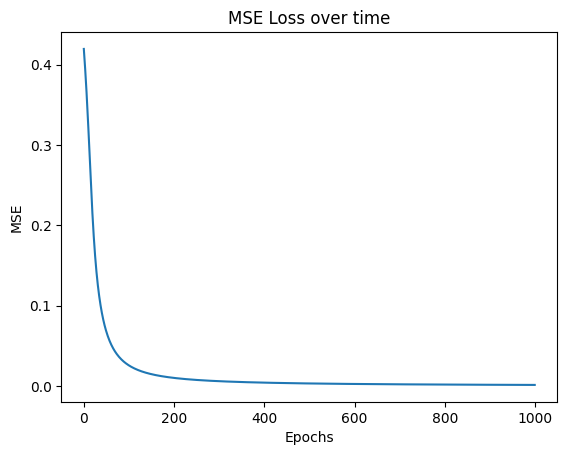

In [23]:
plt.plot(range(epochs, by = 10) epoch_errors)
plt.title("MSE Loss over time")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()